In [11]:
import pandas as pd
stud = pd.read_csv("student-por.csv",sep=',')
stud.shape

(649, 33)

In [12]:
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [13]:
stud.rename(columns = {'sex':'gender'},inplace = True)

In [29]:
stud['alcohol_index'] = (5*stud['Dalc']+2*stud['Walc'])/7

In [30]:
stud['acl'] = stud['alcohol_index']<=2

In [31]:
stud['acl'] = stud['acl'].map({True:'Low',False:'High'})
stud['acl']

0       Low
1       Low
2      High
3       Low
4       Low
       ... 
644     Low
645     Low
646     Low
647    High
648    High
Name: acl, Length: 649, dtype: object

<AxesSubplot:title={'center':'Alcohol Consumption'}>

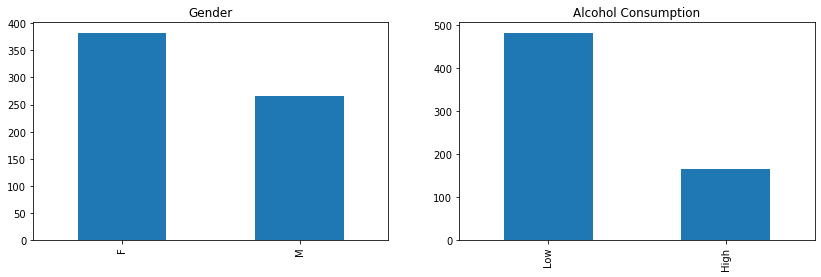

In [21]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(1,2,figsize = (14,4))
stud['gender'].value_counts().plot(kind = 'bar', ax=axes[0],title='Gender')
stud['acl'].value_counts().plot(kind = 'bar', ax=axes[1],title='Alcohol Consumption')

In [23]:
consump = pd.crosstab(stud['acl'],stud['gender'])
consump

gender,F,M
acl,,
High,62,104
Low,321,162


<AxesSubplot:xlabel='acl'>

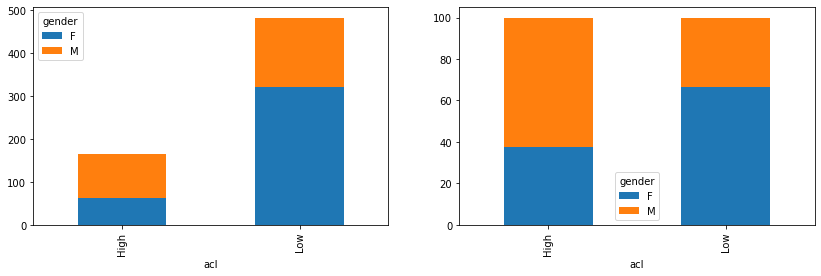

In [25]:
fig,axes = plt.subplots(1,2,figsize = (14,4))
consump.plot(kind='bar',stacked = True,ax = axes[0])
(100*(consump.T/consump.apply(sum,axis=1)).T).plot(kind='bar',stacked = True,ax = axes[1])

# Analyize

In [26]:
stud['gender'] = stud['gender'].map({'F':0,'M':1}).astype(int)
stud['famsize'] = stud['famsize'].map({'LE3':0,'GT3':1}).astype(int)

In [32]:
stud['acl'] = stud['acl'].map({'Low':0,'High':1}).astype(int)

In [38]:
features = ['gender','famsize','age','studytime','famrel','goout','freetime','G3']

In [39]:
x = stud[features]
y = stud['acl']

## Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x,y)
pred = lr.predict(x)
cm = pd.crosstab(pred,y)
print(cm)

acl      0    1
row_0          
0      453  105
1       30   61


## Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x,y)
pred = rf.predict(x)
cm = pd.crosstab(pred,y)
print(cm)

acl      0    1
row_0          
0      481    2
1        2  164
